In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision. datasets as dataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt



In [26]:
train_dataset = dataset.FashionMNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = dataset.FashionMNIST(root="./data", train=False, transform=transforms.ToTensor(), download=True)

train_loader =torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100, shuffle=True)
test_loader =torch.utils.data.DataLoader(dataset=test_dataset, batch_size=100, shuffle=False)


In [27]:
class LogisticReg(nn.Module) :
    def __init__(self, input_size, num_classes):
        super(LogisticReg, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [28]:
input_size = 28*28
num_classes=10
num_epochs = 10
lr = 0.001

total_step = len(train_loader)

### model, loss , optimizer

In [29]:
model = LogisticReg(input_size=input_size, num_classes=num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device >> ", device)

model.to(device)

Using device >>  cpu


LogisticReg(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)

Epoch [1/10], Step [100/600], Loss: 1.3094, Train ACC : 0.6800
Epoch [1/10], Step [200/600], Loss: 1.0896, Train ACC : 0.6500
Epoch [1/10], Step [300/600], Loss: 1.0374, Train ACC : 0.6500
Epoch [1/10], Step [400/600], Loss: 0.7034, Train ACC : 0.6900
Epoch [1/10], Step [500/600], Loss: 0.7557, Train ACC : 0.7140
Epoch [1/10], Step [600/600], Loss: 0.7950, Train ACC : 0.7200
Epoch [2/10], Step [100/600], Loss: 0.6351, Train ACC : 0.8000
Epoch [2/10], Step [200/600], Loss: 0.6407, Train ACC : 0.8150
Epoch [2/10], Step [300/600], Loss: 0.5941, Train ACC : 0.8200
Epoch [2/10], Step [400/600], Loss: 0.7481, Train ACC : 0.8075
Epoch [2/10], Step [500/600], Loss: 0.6830, Train ACC : 0.8080
Epoch [2/10], Step [600/600], Loss: 0.7211, Train ACC : 0.8017
Epoch [3/10], Step [100/600], Loss: 0.6530, Train ACC : 0.8100
Epoch [3/10], Step [200/600], Loss: 0.6310, Train ACC : 0.8350
Epoch [3/10], Step [300/600], Loss: 0.5939, Train ACC : 0.8300
Epoch [3/10], Step [400/600], Loss: 0.6042, Train ACC :

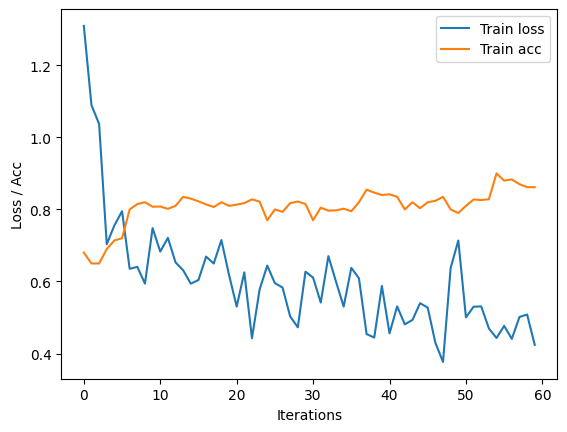

In [30]:
loss_list = []
acc_list = []

for epoch in range(num_epochs) :
    correct = 0
    total = 0
    for i, (imgs, labels) in enumerate(train_loader):
        imgs = imgs.reshape(-1, input_size).to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        #forward propagation, loss calculation
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        
        #backward propagation, weight update
        loss.backward()
        optimizer.step()
        
        #print log
        if (i+1)%100 == 0 :
            loss_list.append(loss.item())
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            acc_list.append(correct / total)
            
            print("Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Train ACC : {:.4f}".format(
                epoch+1, num_epochs, i+1, total_step, loss.item(), acc_list[-1]
            ))
            
        
plt.plot(loss_list, label="Train loss")
plt.plot(acc_list, label="Train acc")
plt.xlabel("Iterations")
plt.ylabel("Loss / Acc")
plt.legend()

plt.show()

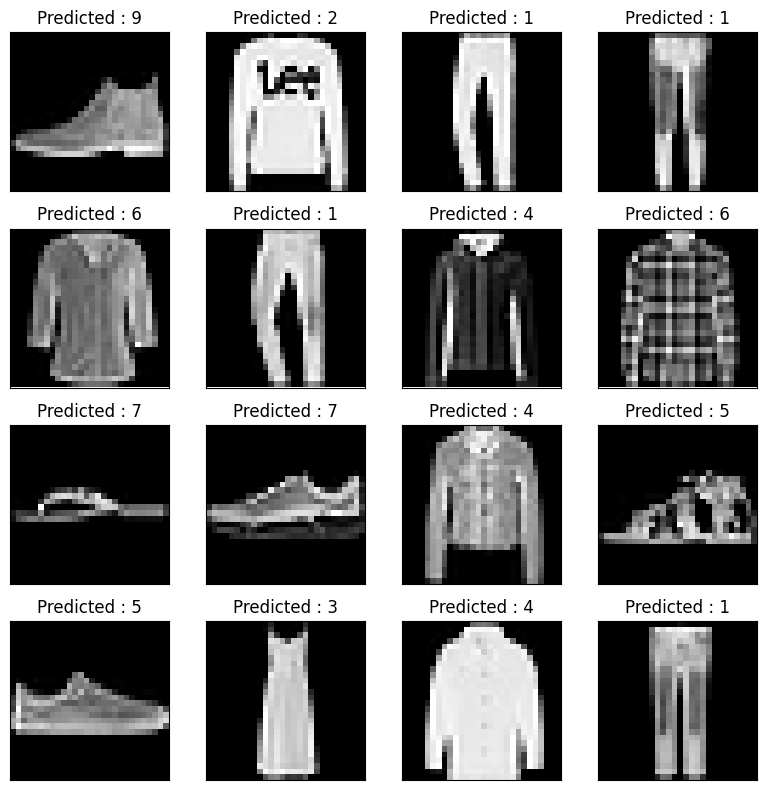

In [31]:
import numpy as np

dataiter = iter(test_loader)
imgs, labels = dataiter.__next__()
img_tmp = imgs.reshape(-1, 28*28)
# print(img_tmp.shape)

model.eval()
output_tmp = model(img_tmp)
_, predicted_test = torch.max(output_tmp.data, 1)
# print(predicted_test)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8), subplot_kw={'xticks' :[], 'yticks' :[]})
for i, ax in enumerate(axes.flat):
    # print(imgs)
    # print(axes.shape)
    ax.imshow(np.squeeze(imgs[i].reshape(28,28)), cmap='gray')
    ax.set_title(f"Predicted : {predicted_test[i].item()}")
    
    
plt.tight_layout()
plt.show()